In [250]:
# Import dependencies
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [251]:
# Read in CSVs from Output
global_disease = pd.read_csv('../Output/csv/global_combined.csv')
global_disease.head(2)

,Unnamed: 0,Entity,Code,Year,Percent with Cardiovascular Disease,Percent with Diabetes & Kidney Disease,Percent with Nutritional Deficiencies,Percent with Cancer,Percent with Chronic Respiratory Diseases,% of Children with Iron Deficiency
0,0,Afghanistan,AFG,2019,1819607.22,476195.52,264468.41,796310.89,306360.72,44.9
1,1,Albania,ALB,2019,221259.93,25818.06,6697.16,111719.01,19951.39,30.9


In [252]:
# Read in global data for geomapping and merge with disease dataframes
world_path = gpd.datasets.get_path('naturalearth_lowres')
world = gpd.read_file(world_path)
world.rename(columns = {'name':'Entity'}, inplace=True)
world=world.iloc[:,[2,5]]
world.head(2)
world = pd.merge(world, global_disease, on = 'Entity')
world.head(2)

,Entity,geometry,Unnamed: 0,Code,Year,Percent with Cardiovascular Disease,Percent with Diabetes & Kidney Disease,Percent with Nutritional Deficiencies,Percent with Cancer,Percent with Chronic Respiratory Diseases,% of Children with Iron Deficiency
0,Fiji,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",50,FJI,2019,74335.94,65540.81,5800.87,24972.10,12115.12,39.9
1,Tanzania,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",144,TZA,2019,1413104.81,531266.34,891871.81,1076035.85,402768.59,56.1


In [253]:
# Geomapping global data function
def global_map(factor,title):
    world.plot(column = factor,
        figsize=(12,6),
        legend = True,
        cmap = 'coolwarm')
    plt.title(f'{title} by Country')
    plt.savefig(f'../Output/maps/World - {title}_by_country')
    

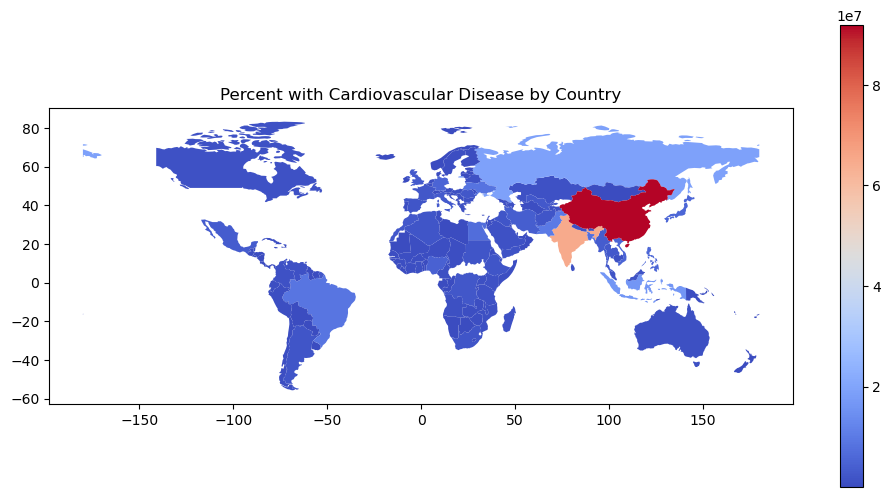

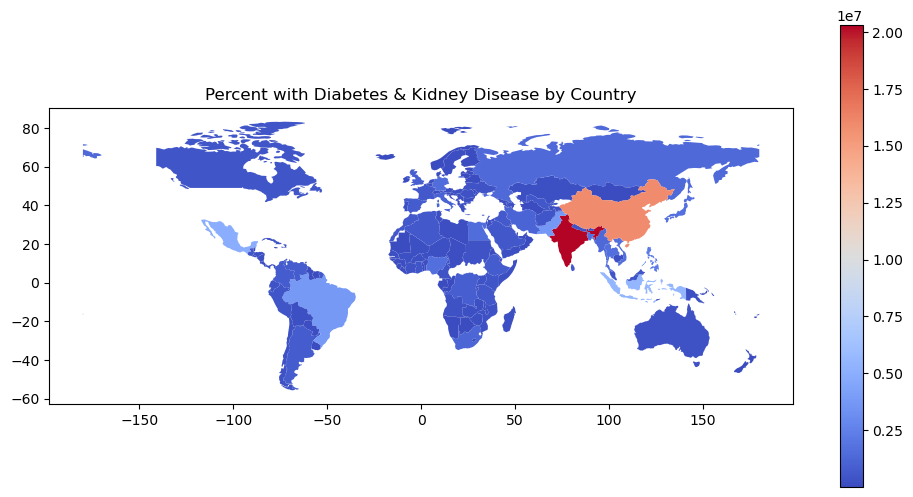

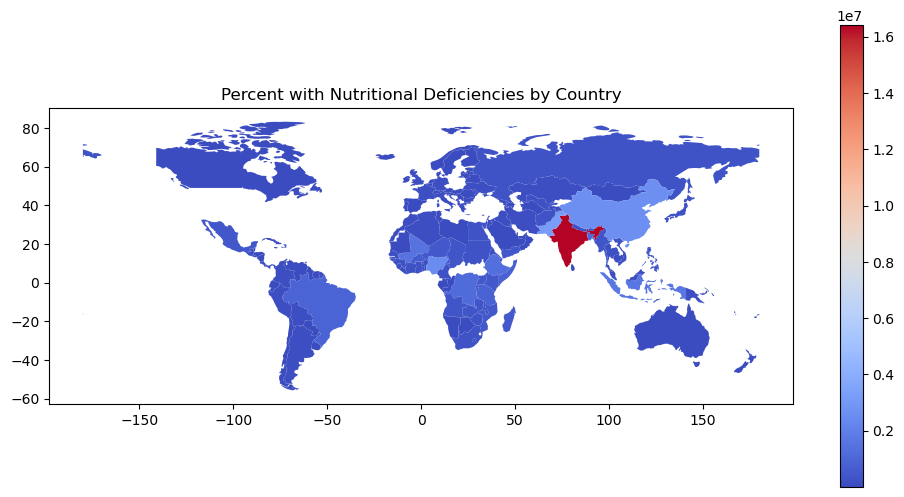

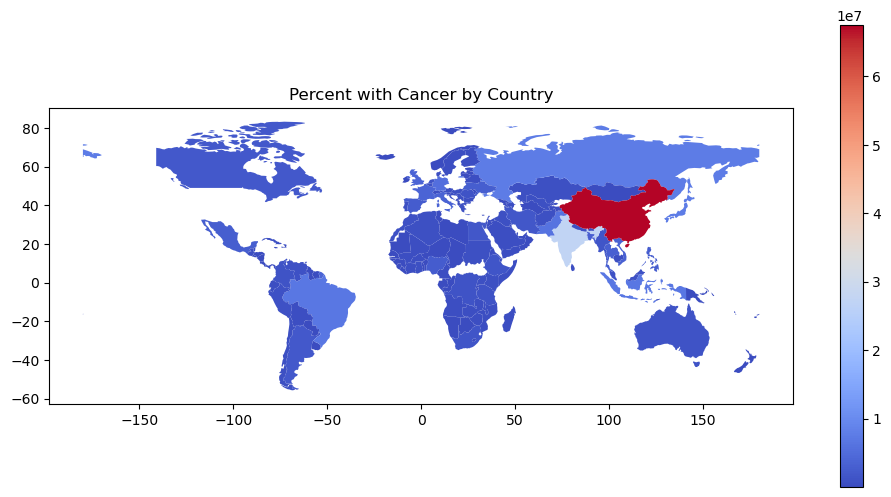

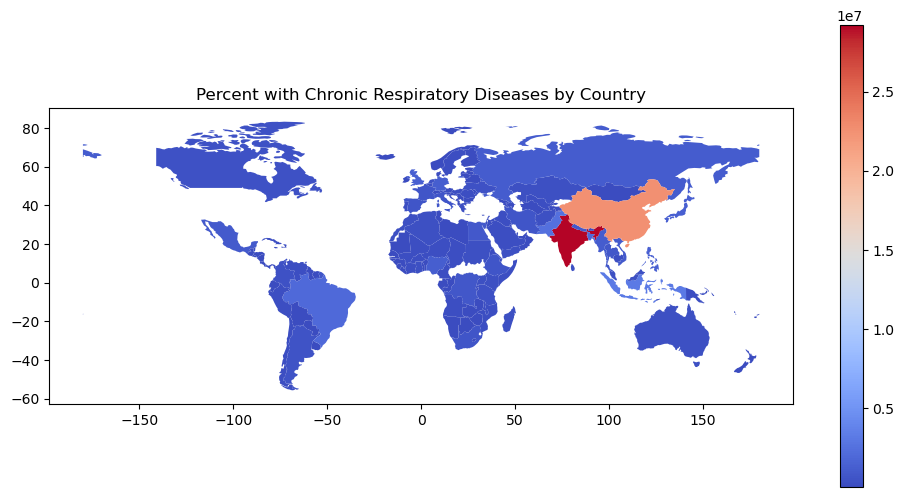

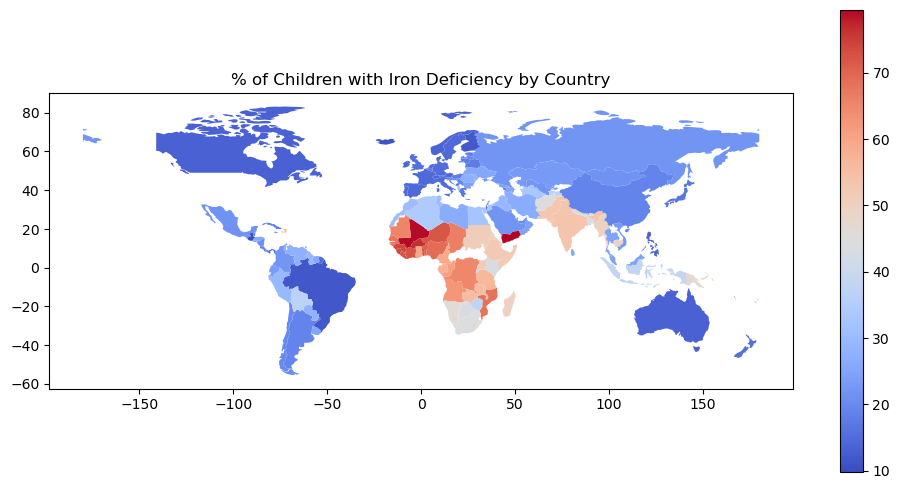

In [254]:
# For loop to save global maps to output folder
for i in [5,6,7,8,9,10]:
    title = (world.columns[i])
    global_map(world[title],title)

In [255]:
# Read in, prep, and merge US disease data
us_disease = pd.read_csv('../Output/csv/us_disease.csv')
usa = gpd.read_file('../Resources/us_shapefiles/States_shapefile.shp')
usa.rename(columns = {"State_Code":"State Abbreviation"},inplace =True)
usa = pd.merge(usa,us_disease,on="State Abbreviation")

In [256]:
usa.head(2)

,FID,Program,State Abbreviation,State_Name,Flowing_St,FID_1,geometry,Unnamed: 0,State,Population,"Cancer Rate per 100,000 People",Prevalance of Lung Disease (%),% of Adults with Diabetes,"Heart Disease per 100,000 People (2019)",Median Household Income
0,2,NaN,AK,ALASKA,N,920,"MULTIPOLYGON (((-161.33379 58.73325, -161.3824...",4,Alaska,733603,418.5,4.6,8.7,129.7,"75,500"
1,4,PDS,AR,ARKANSAS,F,922,"POLYGON ((-94.46169 34.19677, -94.45262 34.508...",22,Arkansas,3020985,487.6,8.1,12.4,226.5,"49,000"


In [257]:
# Read in and merge income and deficiency data for US
us_income = pd.read_csv('../new_csv/states.csv')
us_income = us_income.iloc[:,[1,4]]
us_income.rename(columns={'2019':'Median Household Income'},inplace=True)
usa = pd.merge(usa,us_income,on='State')
usa.drop(usa.columns[[0,1,3,4,5,7]], axis = 1, inplace=True)
# us_deficiency = pd.read_csv('../Output/csv/us_deficiencies')
# usa = pd.merge(usa, us_deficiency, on= "State Abbreviation")

In [258]:
usa.head()

,State Abbreviation,geometry,State,Population,"Cancer Rate per 100,000 People",Prevalance of Lung Disease (%),% of Adults with Diabetes,"Heart Disease per 100,000 People (2019)",Median Household Income_x,Median Household Income_y
0,AK,"MULTIPOLYGON (((-161.33379 58.73325, -161.3824...",Alaska,733603,418.5,4.6,8.7,129.7,"75,500","75,500"
1,AR,"POLYGON ((-94.46169 34.19677, -94.45262 34.508...",Arkansas,3020985,487.6,8.1,12.4,226.5,"49,000","49,000"
2,CA,"MULTIPOLYGON (((-121.66522 38.16929, -121.7823...",California,39437610,397.0,5.1,9.7,136.9,"80,400","80,400"
3,IA,"POLYGON ((-91.12013 40.70544, -91.12930 40.682...",Iowa,3159596,494.1,5.6,8.8,172.9,"61,700","61,700"
4,KS,"POLYGON ((-95.07193 37.00148, -95.40662 37.000...",Kansas,2912635,452.2,5.8,10.4,166.0,"62,100","62,100"


In [259]:
# Define function to map US data
def us_maps(disease):
    bins = [usa[disease].min()-1]
    quantiles = usa[disease].quantile([.1,.2,.3,.4,.5,.6,.7,.8,.9]).to_list()
    for i in quantiles:
        bins.append(i)
    bins.append(usa[disease].max()+1)
    labels = []
    for i in range(len(bins)-1):
        j = i+1
        labels.append(f'{round(bins[i],1)} - {round(bins[j],1)}')
    usa[f'{disease} - 10 Quantiles'] = pd.cut(usa[disease], bins = bins, labels = labels, include_lowest=True)
    usa.plot(column = f'{disease} - 10 Quantiles',
        figsize=(12,12),
        legend = True,
        cmap = 'Reds',
        legend_kwds={'loc': 'center left', 'bbox_to_anchor':(1,0.5)})
    plt.title(disease)
    plt.savefig(f'../Output/maps/US - {title}')

TypeError: unsupported operand type(s) for -: 'str' and 'int'

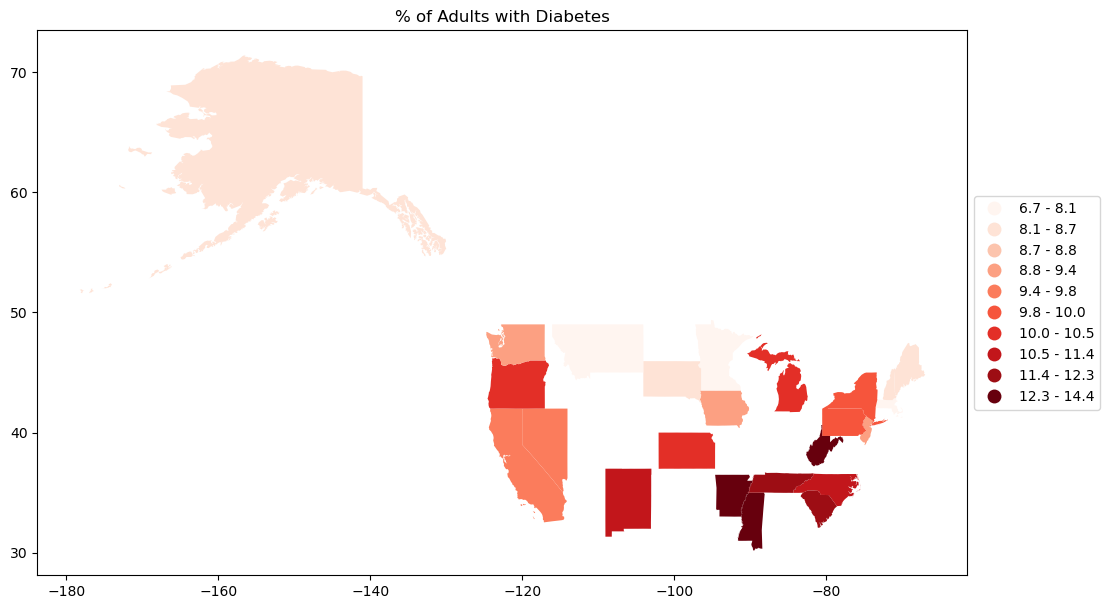

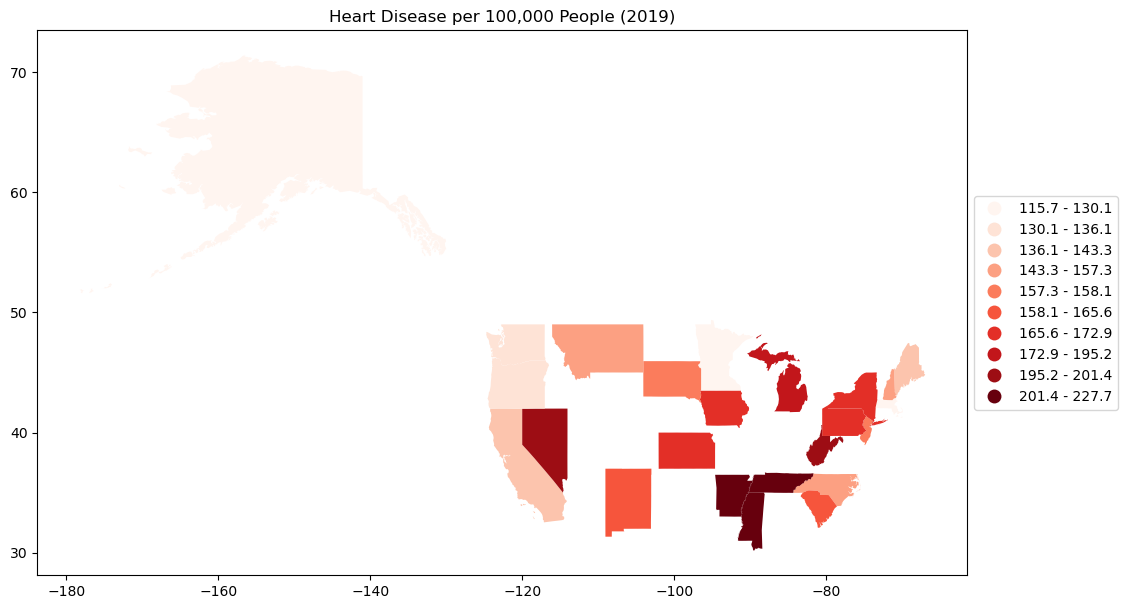

In [260]:
# Loops through applicable rows to send to mapping function
for i in range(len(usa.columns) - 4,len(usa.columns)):
    title = usa.columns[i]
    us_maps(title)

In [ ]:
# Read in and prep US data
houston_disease = pd.read_csv('../Output/csv/houston_disease.csv')
zips = gpd.read_file('../Resources/zip_shapefile/tl_2019_us_zcta510.shp')
zips = zips.rename(columns={'ZCTA5CE10':'Zip Code'})
zips = zips.iloc[:,[0,9]]
zips.head(2)

In [ ]:
# Change data type to match geopandas and merge
houston_disease['Zip Code'] = houston_disease['Zip Code'].astype(str)
zips = pd.merge(zips,houston_disease,on='Zip Code')
zips.head()

In [ ]:
# Define function to create maps of Houston
def houston_maps(disease):
    bins = [zips[disease].min()-1]
    quantiles = zips[disease].quantile([.1,.2,.3,.4,.5,.6,.7,.8,.9]).to_list()
    for i in quantiles:
        bins.append(i)
    bins.append(zips[disease].max()+1)
    labels = []
    for i in range(len(bins)-1):
        j = i+1
        labels.append(f'{round(bins[i],1)} - {round(bins[j],1)}')
    zips[f'{disease} - 10 Quantiles'] = pd.cut(zips[disease], bins = bins, labels = labels, include_lowest=True)
    zips.plot(column = f'{disease} - 10 Quantiles',
        figsize=(12,12),
        legend = True,
        cmap = 'Reds',
        legend_kwds={'loc': 'center left', 'bbox_to_anchor':(1,0.5)})
    plt.title(disease)
    plt.savefig(f'../Output/maps/Houston - {title}')

In [ ]:
# Merge in data from income and vitamin deficiency - Houston
# houston_income = pd.read_csv('../Output/csv/houston_income.csv')
# zips = pd.merge(zips,houston_income,on='Zip Code')

# houston_deficiency= pd.read_csv('../Output/csv/houston_deficiency.csv')
# zips = pd.merge(zips,houston_deficiency,on='Zip Code')

In [ ]:
zips.head()

In [ ]:
# Additional cleaning to go here as needed
zips.to_csv('../Output/csv/houston_combined.csv')

In [ ]:
# Run function for applicable columns for Houston
for i in range(len(zips.columns) - 5,len(zips.columns)):
    title = zips.columns[i]
    houston_maps(title)